In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
import netCDF4 as nc
import scipy as sci
from scipy import signal
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import xarray as xr

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',edgecolor='k',linewidth=3)
parameters = {'xtick.labelsize':14,
              'ytick.labelsize':14,
              'axes.labelsize':14,
              'axes.labelweight':'bold',
              'axes.titleweight':'bold',
              'axes.titlesize':18,
              'axes.linewidth':2}
plt.rcParams.update(parameters)

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy.fft import fft 
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy.ma as ma
import time
import xarray as xr

In [24]:
def eof(y, nmes, nm, alfa):

        #Y es el campo
        #alfa es el nivel de significacion. Por ejemplo alfa=0.01 quiere decir un nivel de confianza del 99%\n",
        #nm es el numero de modos y nmes es simplemente si por cada año tenemos un dato medio (media de DEF) o el dato 
        # intraestacional (diciembre, enero y febrero por separado).Normalmente nmes es 1
        ny,nt=y.shape
        nyr=int(nt/nmes)
        #first you calculate the covariance matrix
        C=np.dot(y,np.transpose(y))
        R,d,R=linalg.svd(C,full_matrices=False)
        fvar=d/np.sum(d)
        fig,ax = plt.subplots(figsize = (10,5))
        plt.plot(fvar[:nm],color='Blue',Marker='o',label='Evolucion de autovalores')
        plt.legend()
        plt.grid()
        #Y había que transponerla si originariamente era (espacio, tiempo), pero ATN_e es (tiempo, espacio) así
        #que no se transpone
        PC=np.dot(np.transpose(y),R[:,:nm])
        #calculamos las anomalías estandarizadas
        #estandarizo la Pc
        PCs=anom(np.transpose(PC),nyr,'st')
        Cor=ma.empty([ny,nm]);pvalCor=ma.empty([ny,nm]);Cor_sig=ma.empty([ny,nm]);Reg=ma.empty([ny,nm]);Reg_sig=ma.empty([ny,nm])
        for i in range(nm):
            Cor[:,i], pvalCor[:,i], Cor_sig[:,i], Reg[:,i], Reg_sig[:,i]=IndexRegression(y,PCs[i,:],alfa)

        return Cor,Cor_sig,Reg,Reg_sig,PCs,fvar

In [25]:
def IndexRegression(Data,Index,alfa):
    [n1,n2]=Data.shape #los datos introducidos en Data tienen que tener dimesión n1=espacio, n2=tiempo 
    #inicializamos las matrices
    Cor=ma.empty([n1,])
    Pvalue=ma.empty([n1,])
    reg=ma.empty([n1,])
    reg_sig=ma.empty([n1,])
    for nn in range(n1): #para cada punto del espacio hacemos la correlación de Pearson
        bb=pearsonr(Data[nn,:],Index) #bb tiene dos salidas: la primera es corre y la segunda es p-value 
        Cor[nn]=bb[0]
        Pvalue[nn]=bb[1]
    #generamos una variable que es para que no se muestren mas que los valores de Cor cuando la correlacion
    #es significativa
    Cor_sig=ma.masked_where(Pvalue>alfa,Cor)
    #generamos el mapa de regresión mediante multiplicación matricial. Ojo con las dimensiones!!
    reg=Data.dot(Index)/ (n2-1)
    #igualmente, hacemos una máscara para que sólo se muestre el mapa de regresión cuando es significativo
    reg_sig=ma.masked_where(Pvalue>alfa,reg)
    return Cor,Pvalue,Cor_sig,reg,reg_sig

In [ ]:

# =============================================================================
# (PARTE 2):
#  Uso de EOFs
# -Calcula la matriz de covarianza del campo de SST en DEF en el Pacífico (entre
# -40 y 40 º de latitud)
# -Diagonaliza la matriz de covarianza y representa los mapas de regresión
# significativos de los tres primeros modos, así como las componentes
# principales estandarizadas.
# -Reconstruye el año 1998 usando 1 modo, 2 modos y 3 modos.
# -Discute los resultados.
# ===========================

In [50]:

path_SST = r'C:/Users/Portatil/Desktop/Analisis_de_datos_en_meteorologia/Practica_3_entregar/'
file_SST = r'HadISST1_sst_1870-2019 .nc'
    
data_SST_nc = nc.Dataset(path_SST+file_SST)

In [51]:
# Extraemos lat, lon,.. y escogemos tiempos y malla
lon_SST_nc = data_SST_nc.variables['longitude'][:]
lat_SST_nc = data_SST_nc.variables['latitude'][:]
sst_nc = data_SST_nc.variables['sst'][:]
time_SST_nc = data_SST_nc.variables['time'][:]

LN,LS,LW,LE = 40,-40,-80,120

boxLon= lon_SST_nc[(lon_SST_nc<LW)]
boxLat=lat_SST_nc[(lat_SST_nc>LS)&(lat_SST_nc<LN)]

sst_reg = sst_nc[:,:,(lon_SST_nc<LW)][:,(lat_SST_nc>LS)&(lat_SST_nc<LN),:]

nt,nlat,nlon = sst_reg.shape
nm = 12
nyears = int(nt/nm)

<ipython-input-51-e505520197a6>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon_SST_nc = data_SST_nc.variables['longitude'][:]
<ipython-input-51-e505520197a6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat_SST_nc = data_SST_nc.variables['latitude'][:]
<ipython-input-51-e505520197a6>:4: DeprecationWarning: `np.bool` is a deprecated alias 

Reordeanmos  cojemos DEF

In [52]:
sst_reg_reshaped = sst_reg.reshape(nyears,nm,nlat,nlon)

mean_D = sst_reg_reshaped[:-1,[11],:,:].mean(axis=1)#no cogemos el último deciembre
mean_J= sst_reg_reshaped[1:,[0],:,:].mean(axis=1)#no cogemos el primer enero
mean_F= sst_reg_reshaped[1:,[1],:,:].mean(axis=1)#ni el primer febrero

mean_DEF = (mean_D+mean_J+mean_F)/3




Calculamos anomalias para DEF

In [53]:
anom_reg = mean_DEF-mean_DEF.mean(axis=0) #calculamos anomalias de las SST en la caja recortada

C:\Users\Portatil\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Portatil\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


Text(0.5, 1.0, 'ANOM SST 1977-1978 invierno (DEF)')

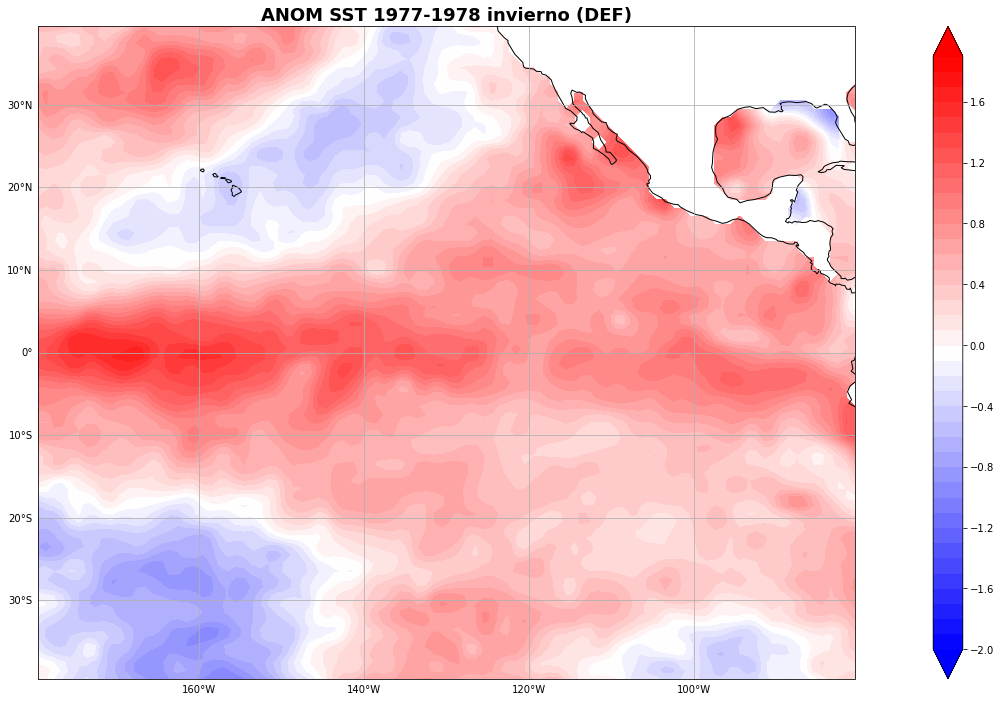

In [54]:
[lon2d_SST_nc,lat2d_SST_nc] = np.meshgrid(boxLon, boxLat)
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,anom_reg[124,:,:],cmap='bwr',levels=np.arange(-2,2,0.1),extend='both'
               ,transform = ccrs.PlateCarree())

gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
 

ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('ANOM SST 1977-1978 invierno (DEF)',fontsize=18,weight='bold')

In [55]:
anom_reg_ns=anom_reg.reshape(149,nlat*nlon) #ponemos los datos como si fueran
#[estaciones (149, 1 por cada año), puntos espaciales]

#con unidades (tiempo*espacio)(150*8000) 

Matriz de covarianza

In [56]:
COV_matrix_def = np.dot(np.transpose(anom_reg_ns),(anom_reg_ns))/(anom_reg_ns[0]-1)

Diagonalizamos

In [57]:
# Para diagonalizar
eof_def,d_def,eof2_def =np.linalg.svd(COV_matrix_def) #---> NO FUNCIONA, AQUÍ ESTÁ EL ERROR

d_def.shape
fvar_def=(d_def)/sum(d_def)

<ipython-input-58-a9f72e4faa63>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(fvar_def[:10],color='Blue',Marker='o',label='Evolucion de autovalores')


Text(0.5, 1.0, 'Porcentaje de variabilidad explicada por los 10 primeros autovalores')

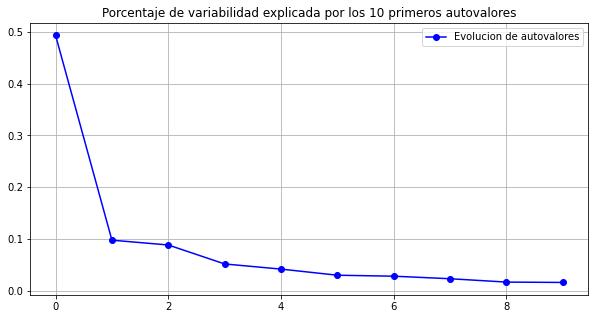

In [58]:
# Dibujamos los 10 primeros autovalores:
fig,ax = plt.subplots(figsize = (10,5))
plt.plot(fvar_def[:10],color='Blue',Marker='o',label='Evolucion de autovalores')
plt.legend()
plt.grid()
plt.title('Porcentaje de variabilidad explicada por los 10 primeros autovalores')

Regresión Pcs

In [59]:
# Calculamos la PC
PC = np.dot(anom_reg_ns,eof_def[:,:3])

#la estandarizamos
PCs = PC/np.std(PC)

# Calculamos el mapa de regresión para representar la EOF 1
PC1s_def =PCs[:,0]
PC2s_def = PCs[:,1]
PC3s_def = PCs[:,2]
CEOF_def_1,sig_EOF_def_1,CEOF_sig_def_1,regEOF_def_1,regEOF_sig_def_1 = IndexRegression(np.transpose(anom_reg_ns),np.transpose(PC1s_def),0.01)
CEOF_def_2,sig_EOF_def_2,CEOF_sig_def_2,regEOF_def_2,regEOF_sig_def_2 = IndexRegression(np.transpose(anom_reg_ns),np.transpose(PC2s_def),0.01)
CEOF_def_3,sig_EOF_def_3,CEOF_sig_def_3,regEOF_def_3,regEOF_sig_def_3 = IndexRegression(np.transpose(anom_reg_ns),np.transpose(PC3s_def),0.01)

C:\Users\Portatil\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Text(0.5, 1.0, 'Primera componente principal fvar=49.3%')

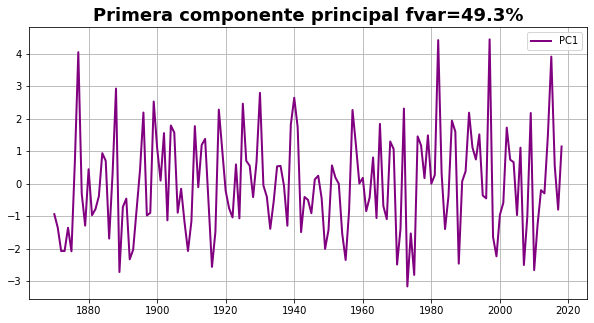

In [60]:
# Representamos la PC1
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1870,2019),PC1s_def,linewidth= 2,color='purple',label='PC1')
ax.grid()
ax.legend()
ax.set_title('Primera componente principal fvar={}%'.format(np.round((sum(fvar_def[:1])*100),1)),fontsize=18,weight='bold')

Text(0.5, 1.0, 'RegEOF1')

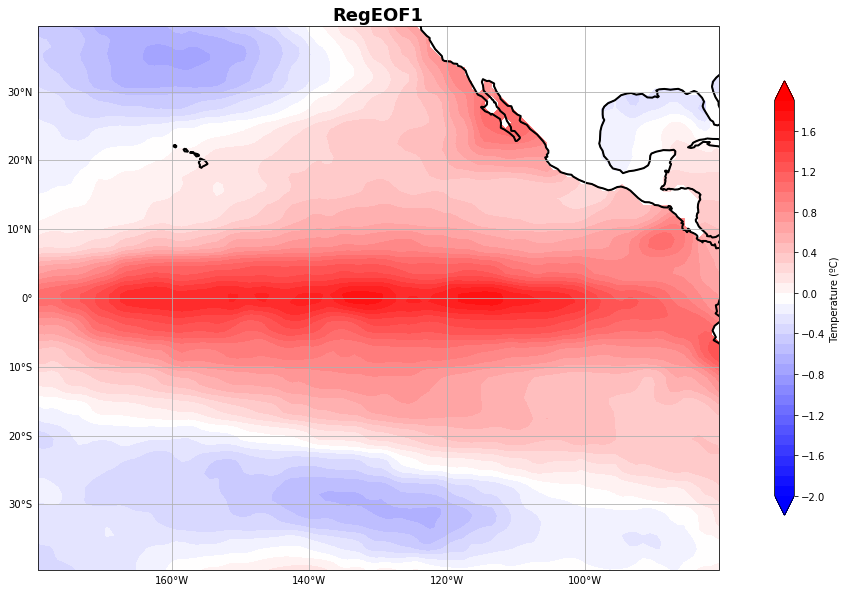

In [78]:
# Y el mapa de regresión significativa asociada a la PC1

fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(linewidth = 2)
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,regEOF_def_1.reshape((nlat),(nlon)),cmap='bwr',levels=np.arange(-2,2,0.1),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax,orientation = 'vertical',shrink=0.8, label = ' Temperature (ºC) ')
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
    
ax.set_title('RegEOF1',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Segunda componente principal fvar=9.7%')

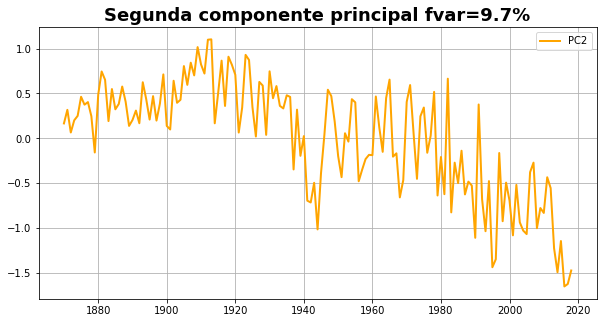

In [79]:
# Representamos la PC2
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1870,2019),PC2s_def,linewidth= 2,color='orange',label='PC2')
ax.grid()
ax.legend()
ax.set_title('Segunda componente principal fvar={}%'.format(np.round((sum(fvar_def[1:2])*100),1)),fontsize=18,weight='bold')

Quitamos tendencia a la PC2 

In [66]:
Pc2_sin_tendencia = signal.detrend(PC2s_def)

Text(0.5, 1.0, 'Segunda componente principal fvar=9.7%')

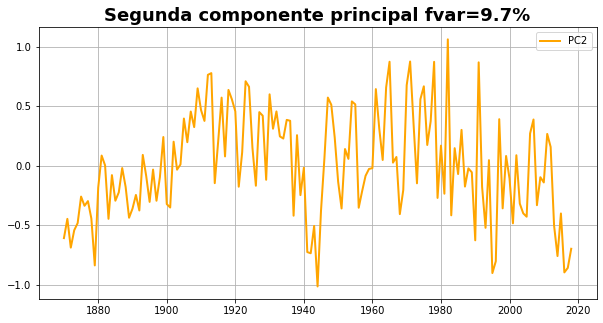

In [69]:
# Representamos la PC2
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1870,2019),Pc2_sin_tendencia,linewidth= 2,color='orange',label='PC2')
ax.grid()
ax.legend()
ax.set_title('Segunda componente principal fvar={}%'.format(np.round((sum(fvar_def[1:2])*100),1)),fontsize=18,weight='bold')

Text(0.5, 1.0, 'RegEOF2')

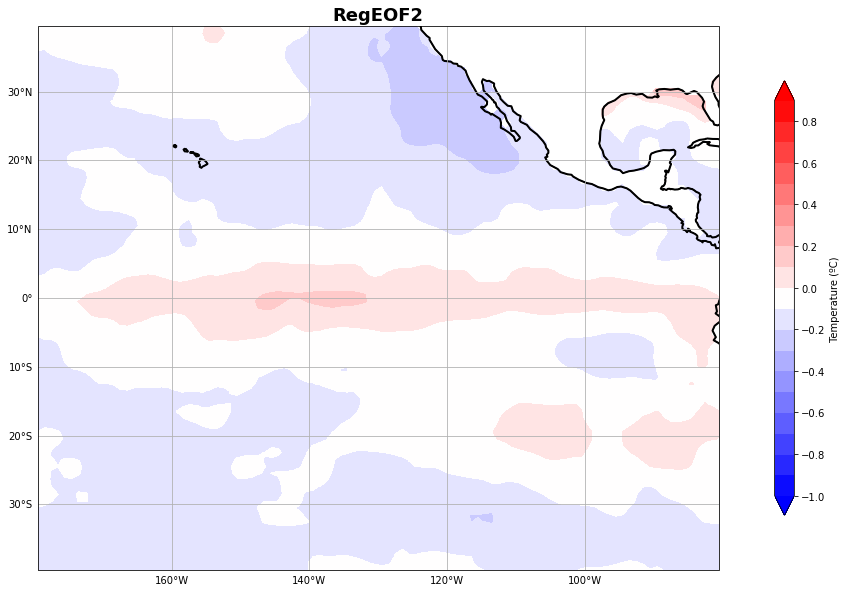

In [81]:
# Y el mapa de regresión significativa asociada a la PC2

fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(linewidth = 2)
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,regEOF_def_2.reshape((nlat),(nlon)),cmap='bwr',levels=np.arange(-1,1,0.1),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax,orientation = 'vertical',shrink=0.8, label = ' Temperature (ºC) ')
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
    
ax.set_title('RegEOF2',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Tercera componente principal fvar=8.8%')

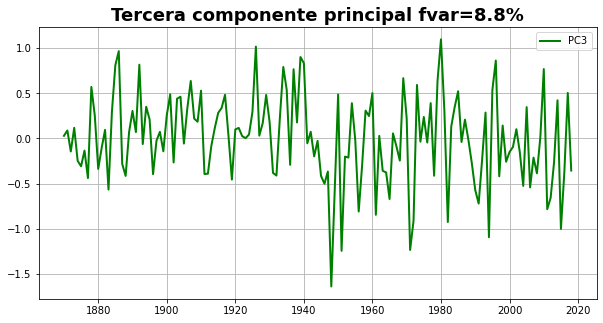

In [130]:
# Representamos la PC3
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1870,2019),PC3s_def,linewidth= 2,color='green',label='PC3')
ax.grid()
ax.legend()
ax.set_title('Tercera componente principal fvar={}%'.format(np.round((sum(fvar_def[2:3])*100),1)),fontsize=18,weight='bold')

Text(0.5, 1.0, 'RegEOF3')

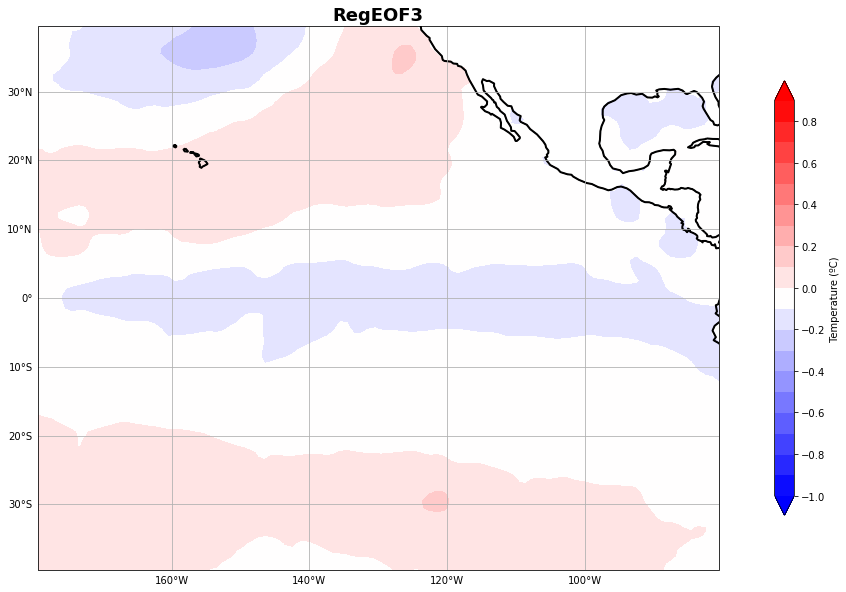

In [90]:
# Y el mapa de regresión significativa asociada a la PC3

fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(linewidth = 2)
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,regEOF_def_3.reshape((nlat),(nlon)),cmap='bwr',levels=np.arange(-1,1,0.1),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax,orientation = 'vertical',shrink=0.8, label = ' Temperature (ºC) ')
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
    
ax.set_title('RegEOF3',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Anom Temp DJF 97-98 reconstruida con PC1')

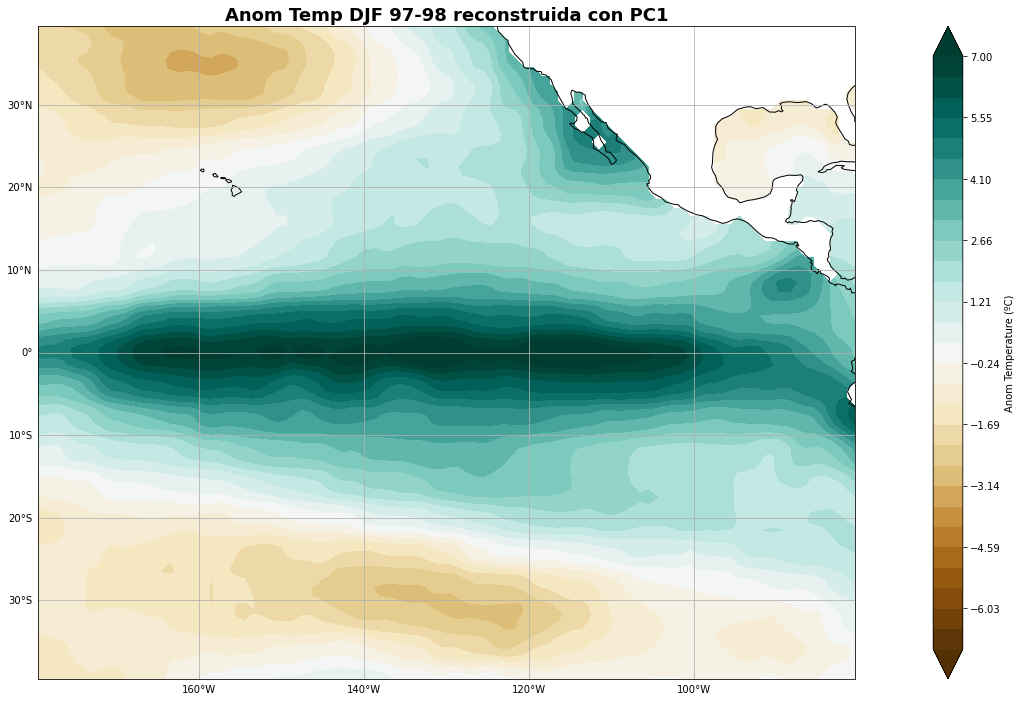

In [91]:
# Finalmente vamos a hacer la reconstrucción, usando 1,2 y 3 modos del año 1998 (D97,J98,F98)

# Usando 1 modo
PC1s_def[0]#-->D1870_J71_F_71
PC1s_def[100]#-->D1970
PC1s_def[127]#-->D1997_J98_F98
Nin_rec_1=regEOF_def_1*PC1s_def[127]


levels_niño = np.linspace(-7,7,30)
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,Nin_rec_1.reshape(nlat,nlon),cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree(),levels= levels_niño)
ax.coastlines()
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
 

fig.colorbar(im,ax=ax, label = 'Anom Temperature (ºC)')
ax.set_title('Anom Temp DJF 97-98 reconstruida con PC1',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Anom Temp DJF 97-98 reconstruida con PC1+PC2')

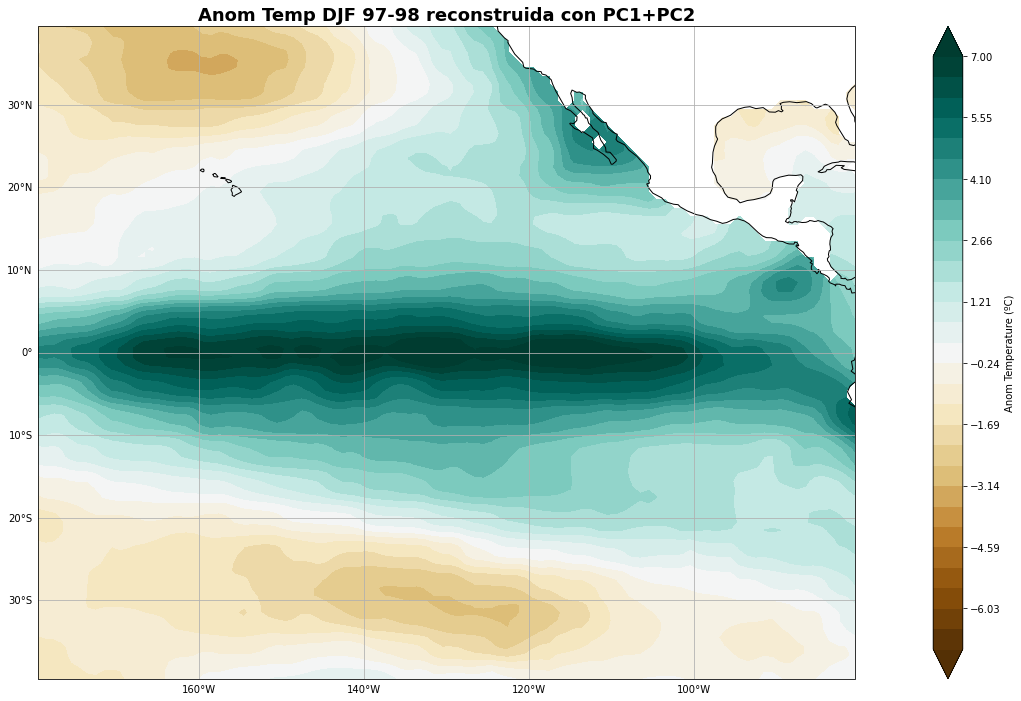

In [92]:
# usando 2 modos
Nin_rec_2=regEOF_def_1*PC1s_def[127]+regEOF_def_2*PC2s_def[127]

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,Nin_rec_2.reshape(nlat,nlon),cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree(),levels= levels_niño)
ax.coastlines()
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
 

fig.colorbar(im,ax=ax, label = 'Anom Temperature (ºC)')
ax.set_title('Anom Temp DJF 97-98 reconstruida con PC1+PC2',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Anom Temp DJF 97-98 reconstruida con PC1+PC2+PC3')

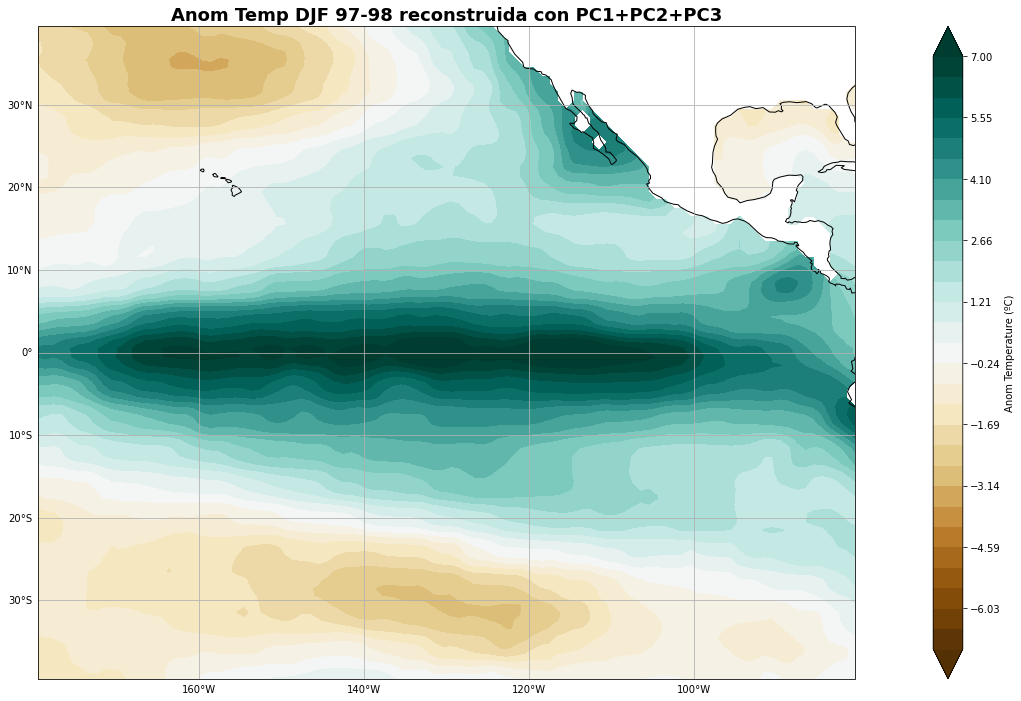

In [93]:
# usando 3 modos
Nin_rec_3=regEOF_def_1*PC1s_def[127]+regEOF_def_2*PC2s_def[127]+regEOF_def_3*PC2s_def[127]

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,Nin_rec_3.reshape(nlat,nlon),cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree(),levels= levels_niño)
ax.coastlines()
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
 

fig.colorbar(im,ax=ax, label = 'Anom Temperature (ºC)')
ax.set_title('Anom Temp DJF 97-98 reconstruida con PC1+PC2+PC3',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Anom Temp DJF 97-98 original')

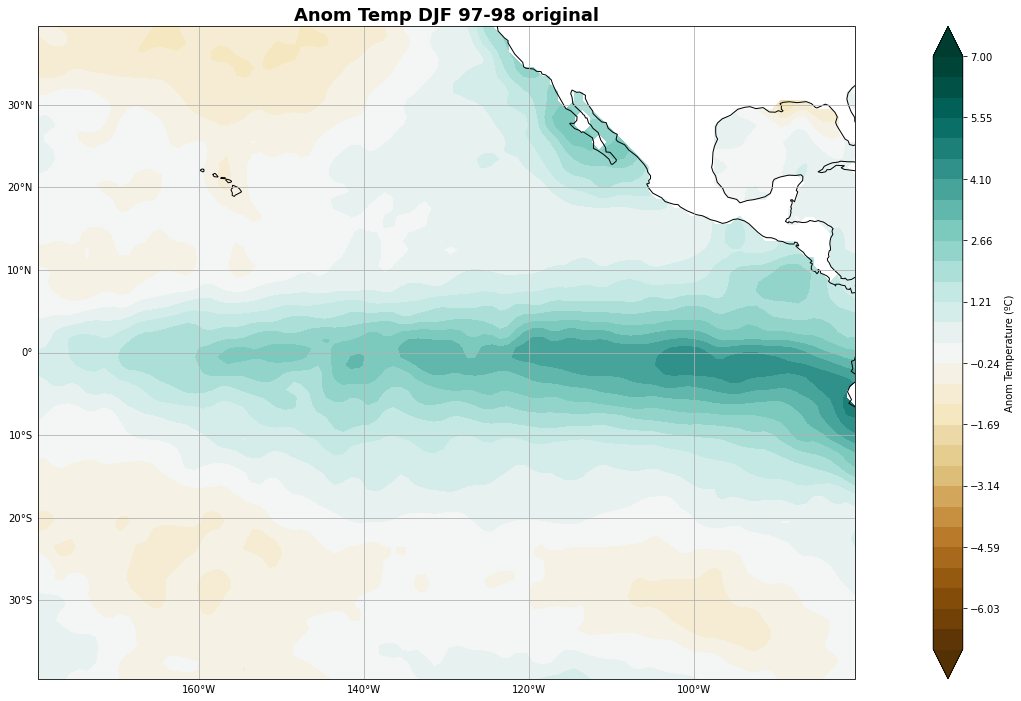

In [94]:
# Veamos el original

levels_niño2 = np.linspace(-5,5,101)
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon2d_SST_nc,lat2d_SST_nc,anom_reg_ns[127,:].reshape(nlat,nlon),cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree(),levels= levels_niño)
ax.coastlines()
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
 

fig.colorbar(im,ax=ax, label = 'Anom Temperature (ºC)')
ax.set_title('Anom Temp DJF 97-98 original',fontsize=18,weight='bold')

In [ ]:

# =============================================================================
# EJERC 2B) b) Caracterización de la estructura espacial de la NAO en Enero y su relación
# con variables atmosféricas:
# Calcula la NAO calculando las EOFs de EFM en el Atlantico Norte. Compara con
# el indice de la NAO. Para el índice de la NAO toma estos datos
# (https://climatedataguide.ucar.edu/climate-data/hurrellnorth-atlantic-oscillation-nao-index-station-based)
# También puedes crear tu el índice tomando las series de SLP en los puntos de
# Lisboa ( Portugal) y Stykkisholmur (Reykjavik, Islandia) y resta ambas series
# temporales.
# =============================================================================

In [95]:

path_slp = r'C:/Users/Portatil/Desktop/Analisis_de_datos_en_meteorologia/Practica_3_entregar/'
file_slp = r'slp_ERA20_1900-2010 .nc'

data_slp = nc.Dataset(path_slp+file_slp)

# Extraemos lat, lon,.. y escogemos tiempos y malla
lat_slp = data_slp.variables['latitude'][:]
lon_slp = data_slp.variables['longitude'][:]
time_slp = data_slp.variables['time'][:]
msl = data_slp.variables['msl'][:]/100 #para pasarlo a hpa

LN,LS,LE,LW = 75,10,360,260

nt, nlat, nlon = msl.shape
nm = 12
nyears = int(nt/nm)
lonmin,lonmax,latmin,latmax = 260, 360, 10, 75
ATN = msl[:,:,(lon_slp>LW)&(lon_slp<LE)][:,(lat_slp>LS)&(lat_slp<LN),:]
yrs = np.arange(1900,2011)
lon_ATN= lon_slp[(lon_slp>LW)&(lon_slp<LE)]
lat_ATN=lat_slp[(lat_slp>LS)&(lat_slp<LN)]

nt,nlat2,nlon2=ATN.shape

<ipython-input-95-01496d0d76f4>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat_slp = data_slp.variables['latitude'][:]
<ipython-input-95-01496d0d76f4>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon_slp = data_slp.variables['longitude'][:]
<ipython-input-95-01496d0d76f4>:9: DeprecationWarning: `np.bool` is a deprecated alias for the buil

In [97]:
msl.shape

(1332, 181, 360)

In [96]:
#solo comgemos enero
ATN_e=ATN.reshape(nyears,nm,nlat2*nlon2)[:,[0],:].mean(1) #ponemos los datos como si fueran
#años, meses, espacio y sólo promediamos el mes 0 que es enero
ATN_e=(ATN_e-ATN_e.mean(0))
ATN_e.shape

(111, 6336)

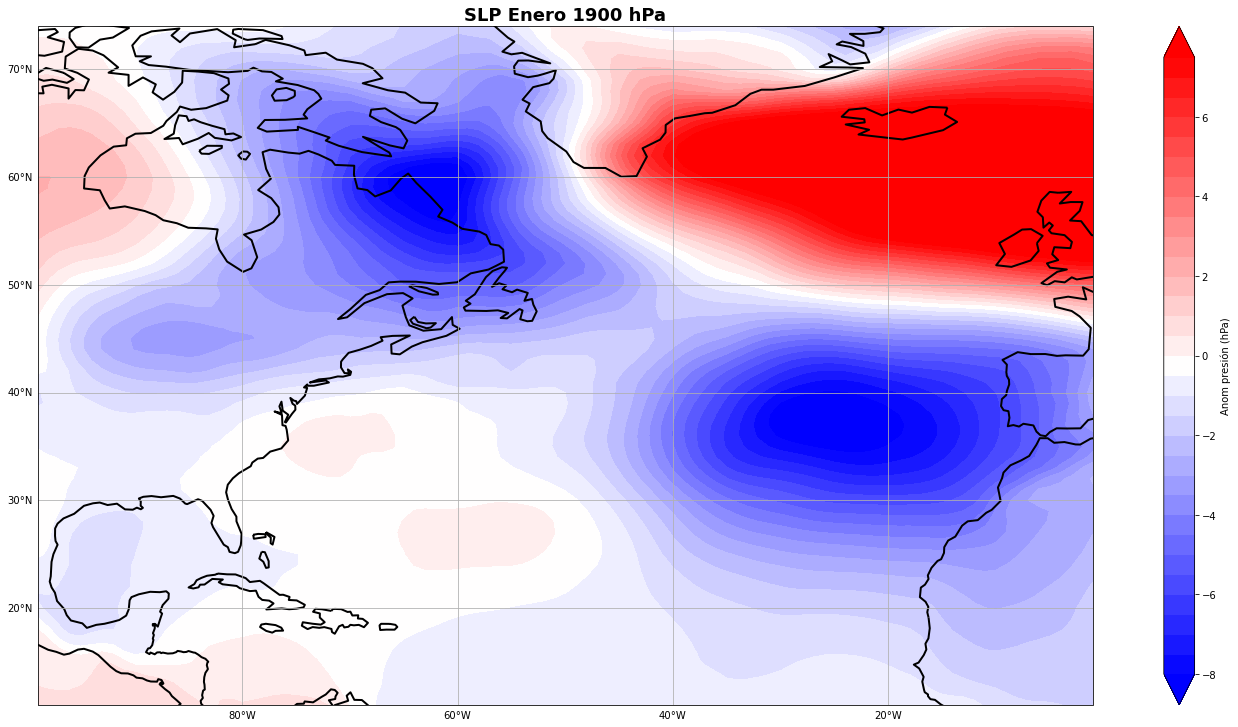

In [109]:
#Creamos la malla -->pq no hace falta¿?
#lat2d_slp,lon2d_slp = xr.broadcast(boxLat_slp,boxLon_slp)


# Plot
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(linewidth = 2)

im = ax.contourf(lon_ATN,lat_ATN,ATN_e[97,:].reshape(len(lat_ATN),len(lon_ATN)),cmap='bwr',levels=np.arange(-8,8,0.5),extend='both'
               ,transform = ccrs.PlateCarree())
#fig.colorbar(ax=ax,orientation = 'vertical',shrink=0.8, label = 'Anom Pressure (hPa) 1900')
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
    
fig.colorbar(im,ax=ax, label ='Anom presión (hPa)')

ax.set_title('SLP Enero 1900 hPa',fontsize=18,weight='bold')
    


fig.tight_layout()

Matriz covarianza y sacamos autovalores

In [110]:
####### Calculamos matriz de covarianza

C=np.dot(np.transpose(ATN_e),ATN_e)
# Calculamos la matriz de covarianza


# Para diagonalizar
eof_slp,d_slp,eof2_slp =np.linalg.svd(C) #wtf is this

# d_slp son los autovalores
fvar=(d_slp)/sum(d_slp)

sum(fvar[:3]) #3 autovalores ya suman el 78% de variabilidad explicada

0.7778787319364817

<ipython-input-111-65efeb8bd8ad>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(fvar[:10],color='Blue',Marker='o',label='Evolucion de autovalores')


Text(0.5, 1.0, 'Porcentaje de variabilidad explicada por los 10 primeros autovalores')

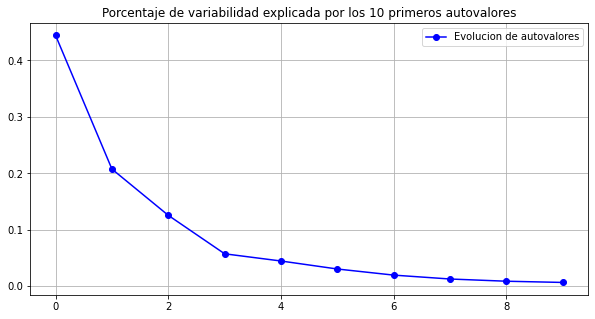

In [111]:
# Dibujamos los 10 primeros autovalores:
fig,ax = plt.subplots(figsize = (10,5))
plt.plot(fvar[:10],color='Blue',Marker='o',label='Evolucion de autovalores')
plt.legend()
plt.grid()
plt.title('Porcentaje de variabilidad explicada por los 10 primeros autovalores')

Text(0.5, 1.0, 'Primera componente principal fvar=')

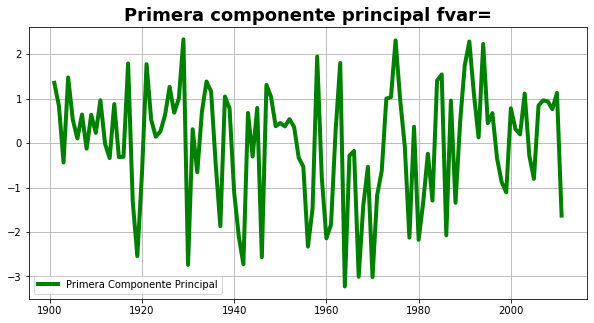

In [112]:
# Paso 4. Calculo de las Componentes Principales y EOF en función de mapas e regresión
# =============================================================================
#Ahora tenemos que hacer la regresión de la EOF sobre los datos de la matriz de ATN_e

#Primero calculamos las componentes principales usandon PCk(t) = Y^t · EOF_k 

PC_slp=np.dot(ATN_e,eof_slp[:,:3]) #3 modos

#la estandarizamos
PCs_slp=PC_slp/np.std(PC_slp)

#cogemos por ejemplo el modo 1 y lo dibujamos
modo=0
PC1s_slp=PCs_slp[:,modo]
PC1s_slp


fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1901,2012),PC1s_slp,linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Primera componente principal fvar=',fontsize=18,weight='bold')

Text(0.5, 1.0, 'SLP enero 1900 EOF1 reg sig')

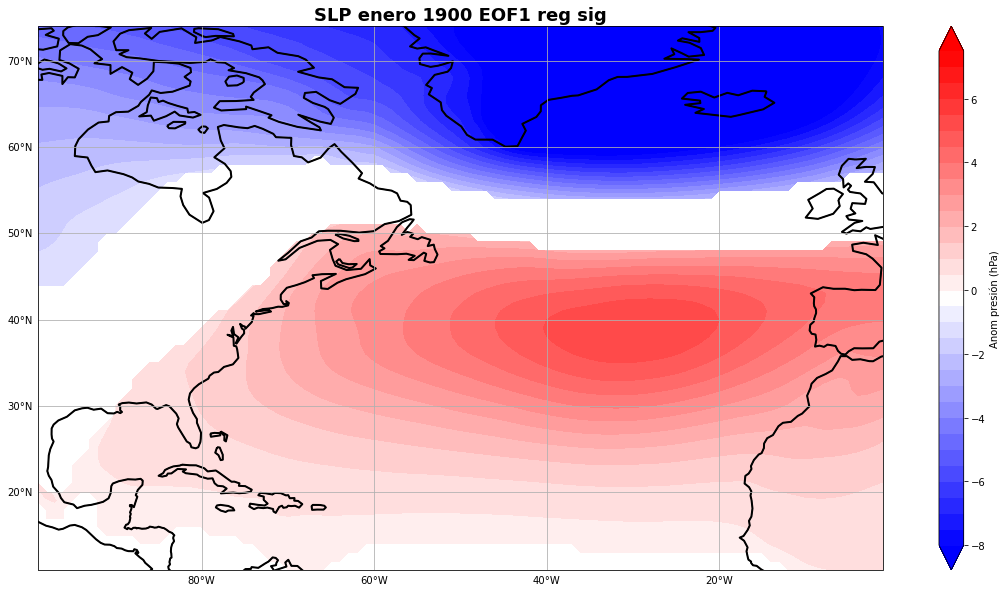

In [117]:
# Paso 5. Calculo del mapa de regresion para representar la EOF


#Por ejemplo aquí representamos el modo 1
CorEOF_slp, sigEOF_slp, CorsigEOF_slp, regEOF_slp, regsigEOF_slp=IndexRegression(np.transpose(ATN_e),np.transpose(PC1s_slp),0.01)

# Y lo dibujamos en forma de mapa de regresión significativo

fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(linewidth = 2)
im = ax.contourf(lon_ATN,lat_ATN,regsigEOF_slp.reshape(len(lat_ATN),len(lon_ATN)),cmap='bwr',levels=np.arange(-8,8,0.5),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
#fig.colorbar(im0,ax=ax,orientation = 'vertical',shrink=0.8, label = ' Pressure (hPa) ')
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
    
fig.colorbar(im,ax=ax, label ='Anom presión (hPa)')

ax.set_title('SLP enero 1900 EOF1 reg sig',fontsize=18,weight='bold')

Text(0.5, 1.0, 'SLP 1996')

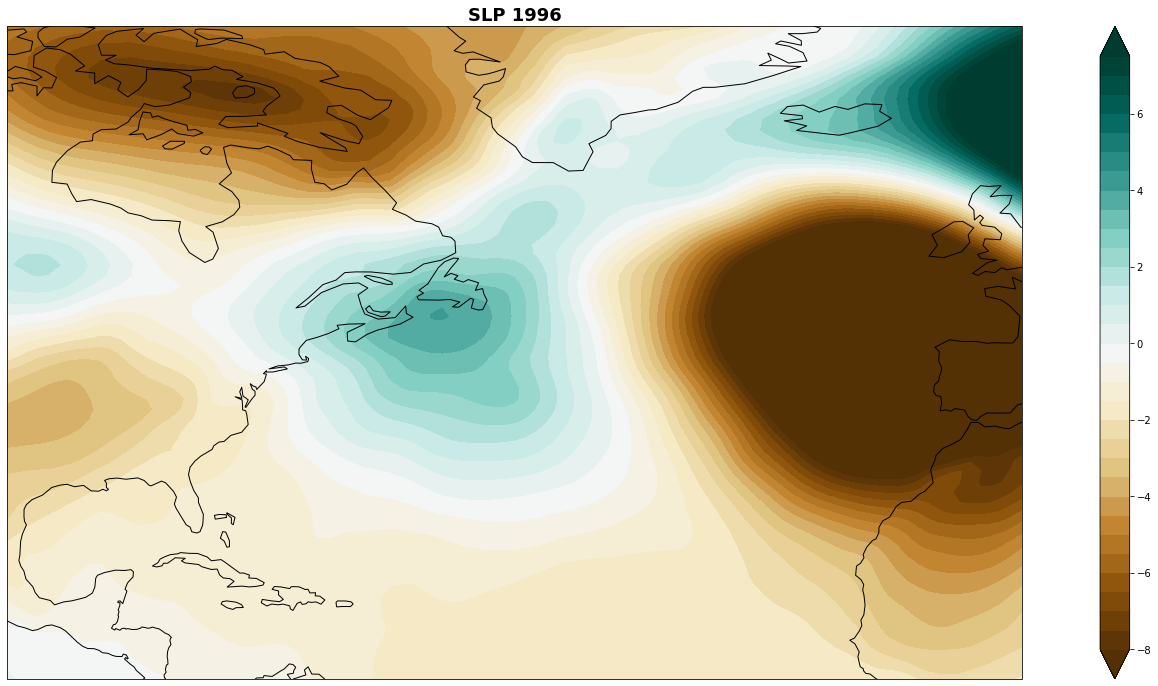

In [118]:
# Reconstruimos el campo, por ejemplo para enero del 96

# Este es el original
Y=ATN_e[yrs==1996] #sacamos el año 1996

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_ATN,lat_ATN,Y.reshape(len(lat_ATN),len(lon_ATN)),cmap='BrBG',levels=np.arange(-8,8,0.5),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('SLP 1996',fontsize=18,weight='bold')

Text(0.5, 1.0, 'SLP 1996 reconstruida con PC1')

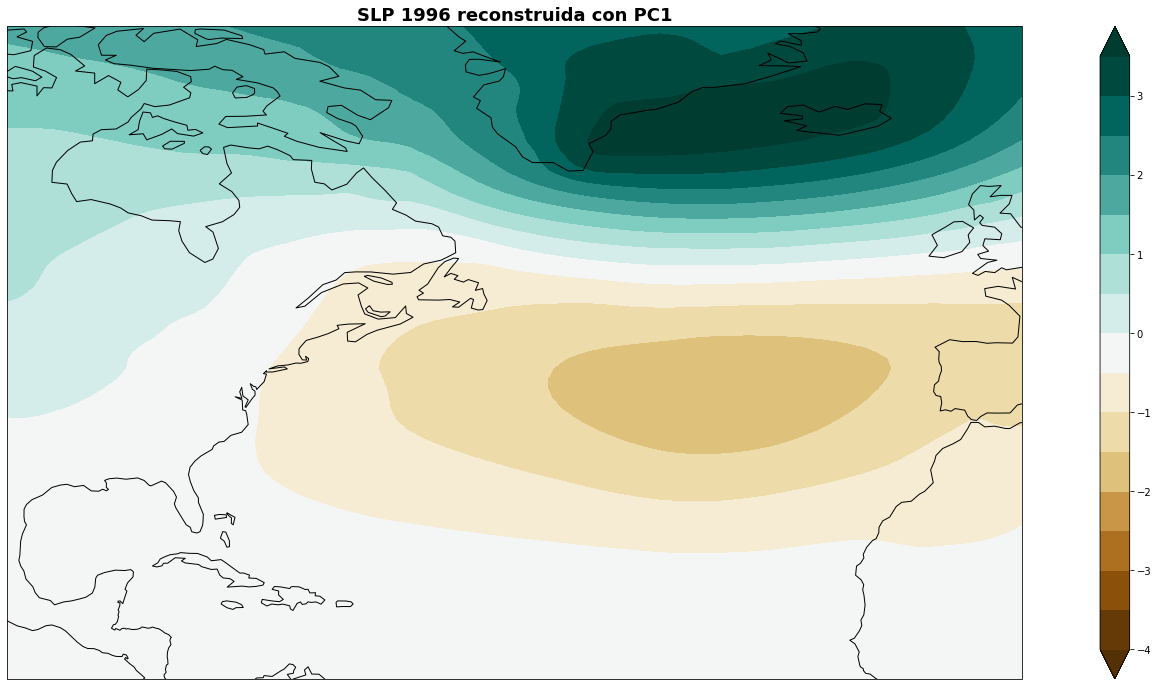

In [120]:
# Ahora reconstruimos con 1 modo
Yreconst=regEOF_slp*PC1s_slp[yrs==1996]

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_ATN,lat_ATN,Yreconst.reshape(len(lat_ATN),len(lon_ATN)),cmap='BrBG',levels=np.arange(-4,4,0.5),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('SLP 1996 reconstruida con PC1',fontsize=18,weight='bold')


In [121]:
# Y si probamos a reconstruir ahora con 2 modos
PC2s_slp=PCs_slp[:,1] #Pc2

#con los 2 primeros modos
Cor2EOF_slp, sig2EOF_slp, Corsig2EOF_slp, reg2EOF_slp, regsig2EOF_slp=IndexRegression(np.transpose(ATN_e),np.transpose(PC2s_slp),0.01)

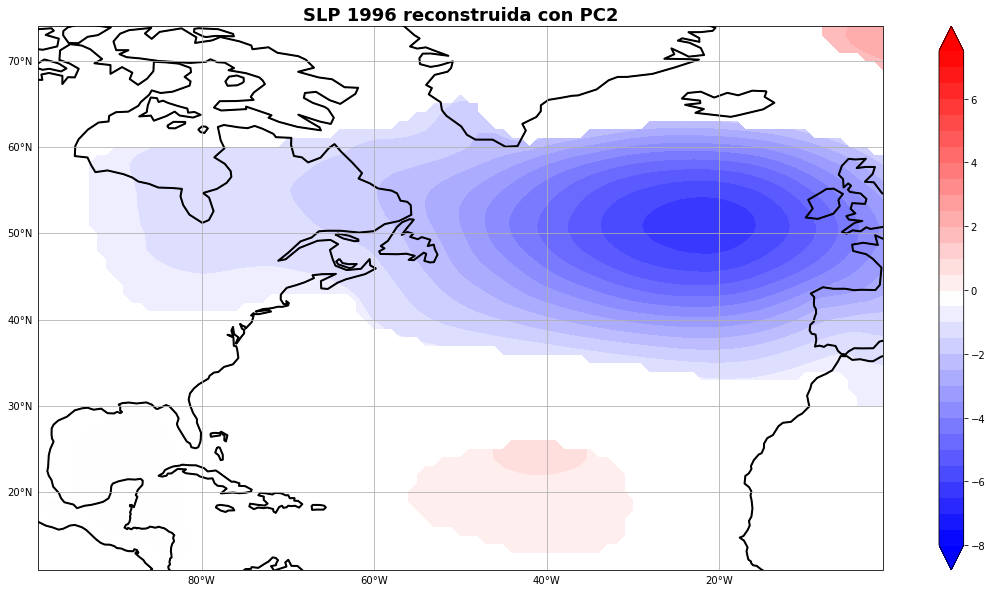

In [125]:
# Y lo dibujamos en forma de mapa de regresión significativo el modo 2

fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(linewidth = 2)
im = ax.contourf(lon_ATN,lat_ATN,regsig2EOF_slp.reshape(len(lat_ATN),len(lon_ATN)),cmap='bwr',levels=np.arange(-8,8,0.5),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
#fig.colorbar(im0,ax=ax,orientation = 'vertical',shrink=0.8, label = ' Pressure (hPa) ')
gl=ax.gridlines(draw_labels = True); #grid
gl.ylabels_right = False #label y axis in rigth size
gl.xlabels_top = False #label x axis in top
    
ax.set_title('SLP 1996 reconstruida con PC2',fontsize=18,weight='bold')
fig.colorbar(im,ax=ax) 

Text(0.5, 1.0, 'SLP 1996 reconstruida con PC1+PC2')

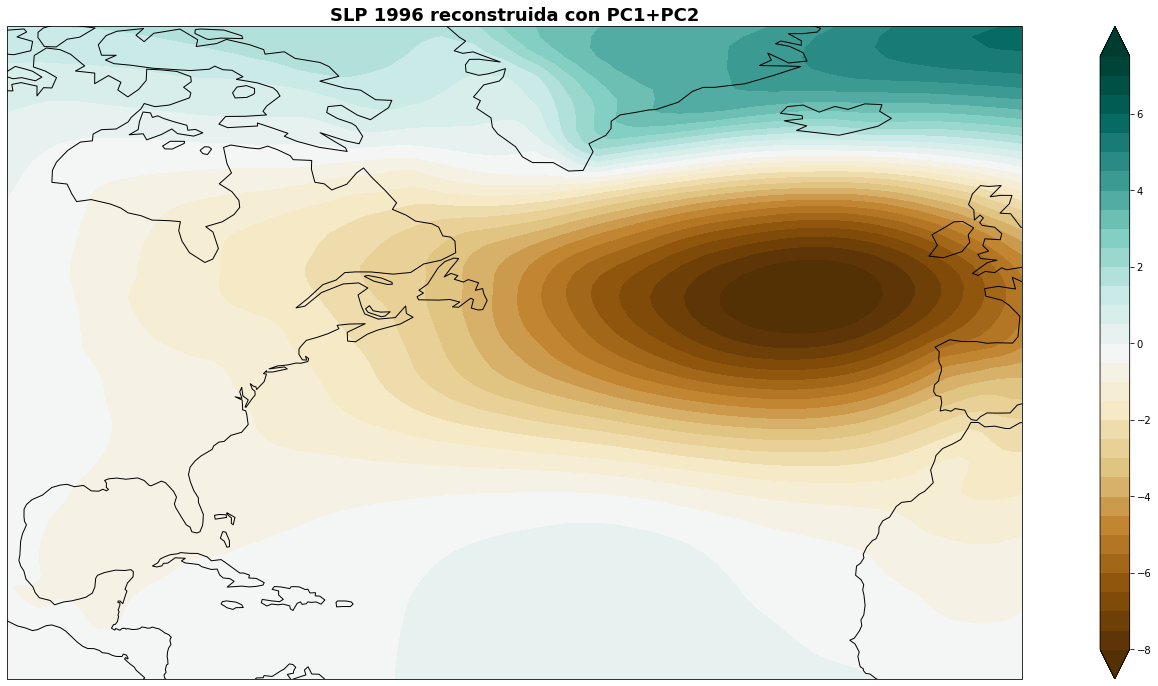

In [127]:
# Ahora reconstruimos con 2 modo
 #Y = sum(EOFk · PCk)
Yreconst2=regEOF_slp*PC1s_slp[yrs==1996] + reg2EOF_slp*PC2s_slp[yrs==1996] #se puede hacer con estos índices pq coincide 1996 con el índice 97?


fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_ATN,lat_ATN,Yreconst2.reshape(len(lat_ATN),len(lon_ATN)),cmap='BrBG',levels=np.arange(-8,8,0.5),extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('SLP 1996 reconstruida con PC1+PC2',fontsize=18,weight='bold')

In [128]:
# =============================================================================
# # Vamos a hacer ahora el ejercicio para la práctica usando enero del año 2010 por ejemplo
# =============================================================================

#cogemos por ejemplo el modo 1,2,3 y dibujamos sus PCs asociadas a cada modo (serie temporal)
#modo 1
PC1s_slp=PCs_slp[:,0]
PC1s_slp

#modo 2
PC2s_slp=PCs_slp[:,1]
PC2s_slp

#modo 3
PC3s_slp=PCs_slp[:,2]
PC3s_slp

masked_array(data=[0.2777488525054764, 0.770767678890814,
                   0.3061693104889731, 1.3814902071313,
                   -0.5338717510902864, -0.4124365814405224,
                   -0.9652781572024381, 0.13360960777611802,
                   1.0868785106621872, -0.685570326717376,
                   -0.6321432765690377, 0.3069361692330213,
                   -0.05831185861540662, -0.27495448174465353,
                   0.8547726128717621, -1.1921967995307443,
                   -0.2113392928072634, 0.4978813269545086,
                   -0.23121928460446056, -0.22699745254625675,
                   -0.6186922956602116, -0.14321448221658775,
                   -0.49169733271021393, -0.031189892992763705,
                   -0.21873242943972715, -0.02650360628416493,
                   0.5462300557888151, -0.4611207977268394,
                   0.41879371010989896, 0.9333760214847133,
                   -1.3681383252756303, 0.27122713346859145,
                   -0.4406317

Text(0.5, 1.0, 'Tercera componente principal fvar=0.13')

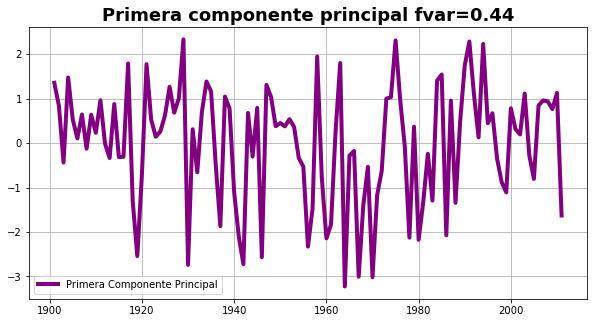

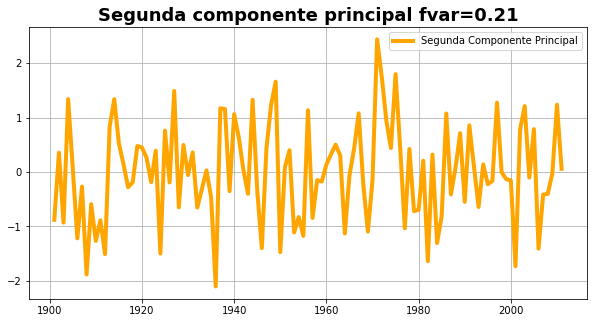

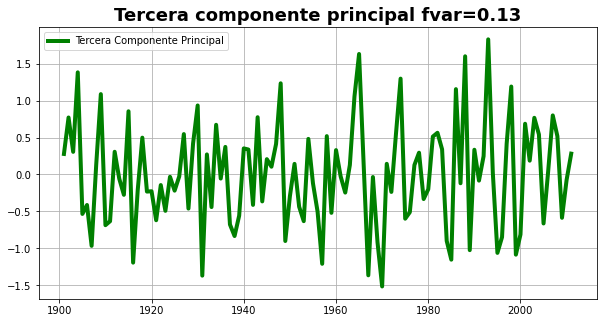

In [129]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1901,2012),PC1s_slp,linewidth= 4,color='purple',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Primera componente principal fvar={}'.format(np.round(fvar[0],2)),fontsize=18,weight='bold')


fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1901,2012),PC2s_slp,linewidth= 4,color='orange',label='Segunda Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Segunda componente principal fvar={}'.format(np.round(fvar[1],2)),fontsize=18,weight='bold')



fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1901,2012),PC3s_slp,linewidth= 4,color='green',label='Tercera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Tercera componente principal fvar={}'.format(np.round(fvar[2],2)),fontsize=18,weight='bold')